In [8]:
!pwd
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
'''
sys.path.append('/Users/suryaven/Documents/personal/sky/skyburst')
sys.path.append('/Users/suryaven/Documents/personal/sky/starburst/')
sys.path.append('/Users/suryaven/Documents/personal/sky/starburst/starburst/utils')
'''
# TODO: Generalize differences between sky laptop and personal latop paths
sys.path.append('/Users/surya/Documents/sky/skyburst/')
sys.path.append('/Users/surya/Documents/sky/starburst/')
sys.path.append('/Users/surya/Documents/sky/starburst/utils')

import starburst
import skyburst
from starburst import utils
import job_logs
import sampled_jobs
import plot_jobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import time 
import copy 
from collections import OrderedDict 
pd.set_option('display.max_columns', None)


/Users/surya/Documents/sky/starburst/starburst/utils


In [9]:
LOGS = {
    "05_01_2023": 1682925843,
    "05_02_2023": 1683099273,
    "05_03_2023": 1683132152,
    "05_03_2023_2": 1683173965,
    "05_04_2023_1": 1683184792, 
    "05_04_2023_2": 1683196845,
    "05_04_2023_3": 1683259533,
    "05_05_2023_4": 1683343491,
    "05_06_2023_4": 1683410859,
    "05_06_2023_5": 1683418719,
    "05_06_2023_6": 1683442154,
    "05_06_2023_7": 1683452077,
    "05_07_2023_1": 1683486242,
    "05_07_2023_2": 1683489564,
    "05_07_2023_3": 1683496107,
    "05_07_2023_4": 1683497538,
    "1683498468": 1683497538, 
    "1683498857": 1683498857,
    "1683499283": 1683499283,
    "1683528723": 1683528723, # Fixed JCT values
    "1683534589": 1683534589, # Large sweep with greater arrival rates
    "1683607638": 1683607638, # Modified arrival rate values to match simulator
    "1683625643": 1683625643, # Policy waits until cluster state is updated
    "1683627780": 1683627780, # Policy waits until cluster state and running pods are updated
    "1683680278": 1683680278, # Sweep with uniform wait (4 sec) and constant timeout (3 sec)
}

logs = LOGS["1683680278"]

job_logs.pull_vm_scheduler_logs(event_number=logs, force=True)
jobs_df = job_logs.retrieve_df(event_number=logs, avoid_congestion=False)
jobs_df = jobs_df.assign(gpus_per_node=jobs_df['cpus_per_node'])

START TIMES {'sleep-0-370199': 1683680379, 'sleep-1-890856': 1683680383, 'sleep-2-587259': 1683680387, 'sleep-3-3252': 1683680391, 'sleep-4-949373': 1683680395, 'sleep-5-424671': 1683680400, 'sleep-6-25718': 1683680404, 'sleep-7-9944': 1683680408, 'sleep-8-856010': 1683680412, 'sleep-9-683501': 1683680416, 'sleep-10-276780': 1683680420, 'sleep-11-801109': 1683680425, 'sleep-12-369480': 1683680428, 'sleep-13-668616': 1683680432, 'sleep-14-283966': 1683680436, 'sleep-15-573025': 1683680440, 'sleep-16-920991': 1683680444, 'sleep-17-967156': 1683680448, 'sleep-18-419383': 1683680452, 'sleep-19-461386': 1683680456, 'sleep-20-907301': 1683680460, 'sleep-21-409949': 1683680464, 'sleep-22-268277': 1683680468, 'sleep-23-729070': 1683680473, 'sleep-24-154671': 1683680476, 'sleep-25-379587': 1683680480, 'sleep-26-960876': 1683680484, 'sleep-27-139494': 1683680488, 'sleep-28-124145': 1683680492, 'sleep-29-39650': 1683680496, 'sleep-30-519075': 1683680500, 'sleep-31-269583': 1683680504, 'sleep-32-4

In [10]:
jobs_df

,idx,runtime,arrival,num_gpus,allocated_gpus,start,instance_type,node_index,node,cpus,submission_time,wait_times,uniform_arrival,uniform_submission,waiting_policy,time_constrained,cluster_size,cpus_per_node,cloud_cluster_nodes,cloud_cpu_per_node,random_seed,total_jobs,batch_time,wait_time,time_out,mean_duration,arrival_rate,cpu_sizes,cpu_dist,gpu_sizes,gpu_dist,memory_sizes,memory_dict,uniform_arrival_sweep,uniform_submission_sweep,waiting_policy_sweep,time_constrained_sweep,cluster_size_sweep,cpus_per_node_sweep,cloud_cluster_nodes_sweep,cloud_cpu_per_node_sweep,random_seed_sweep,total_jobs_sweep,batch_time_sweep,wait_time_sweep,time_out_sweep,mean_duration_sweep,arrival_rate_sweep,cpu_sizes_sweep,cpu_dist_sweep,gpu_sizes_sweep,gpu_dist_sweep,memory_sizes_sweep,memory_dict_sweep,gpus_per_node
0,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[16, 12, 53, 17, 4, 61, 5, 15, 13, 17, 10, 20,...","[2.481705904006958, 7.481705904006958, 11.4817...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[{2: []}, {3: []}, {0: []}, {1: []}, {2: []}, ...","[2.481705904006958, 7.481705904006958, 11.4817...","[e2-standard-8, e2-standard-8, e2-standard-8, ...","[2, 3, 0, 1, 2, 3, 2, 0, 2, 1, 2, 0, 2, 2, 1, ...","[gke-starburst-cpu-workloads-04fa1bcf-b5bt, gk...","[2, 2, 1, 4, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, ...","[0.0, 3.98594331741333, 8.039539813995361, 11....","[2.481705904006958, 3.495762586593628, 3.44216...",4,True,fifo_wait,True,4,8,4,8,0,100,180,3,5,15,0.25,"[1, 2, 4]","[0.6, 0.25, 0.15]","[1, 2, 4, 8, 16, 32]","[0, 0.2, 0.2, 0.2, 0.2, 0.2]","[100, 500, 1000, 50000]","[0.25, 0.25, 0.25, 0.25]",4,True,fifo_wait,True,4,8,4,8,0,100,180,3,5,15,0.25,"[1, 2, 4]","[0.6, 0.25, 0.15]","[1, 2, 4, 8, 16, 32]","[0, 0.2, 0.2, 0.2, 0.2, 0.2]","[100, 500, 1000, 50000]","[0.25, 0.25, 0.25, 0.25]",8
1,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[15, 12, 54, 17, 3, 61, 5, 15, 12, 19, 10, 20,...","[2.682251453399658, 6.682251453399658, 11.6822...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[{2: []}, {0: []}, {3: []}, {1: []}, {2: []}, ...","[2.682251453399658, 6.682251453399658, 11.6822...","[e2-standard-8, e2-standard-8, e2-standard-8, ...","[2, 0, 3, 1, 2, 0, 2, 1, 2, 3, 2, 1, 2, 2, 3, ...","[gke-starburst-cpu-workloads-04fa1bcf-tsf4, gk...","[2, 2, 1, 4, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, ...","[0.0, 3.8979039192199707, 7.793416976928711, 1...","[2.682251453399658, 2.7843475341796875, 3.8888...",4,True,fifo_wait,True,4,8,4,8,0,100,180,3,5,15,0.5,"[1, 2, 4]","[0.6, 0.25, 0.15]","[1, 2, 4, 8, 16, 32]","[0, 0.2, 0.2, 0.2, 0.2, 0.2]","[100, 500, 1000, 50000]","[0.25, 0.25, 0.25, 0.25]",4,True,fifo_wait,True,4,8,4,8,0,100,180,3,5,15,0.5,"[1, 2, 4]","[0.6, 0.25, 0.15]","[1, 2, 4, 8, 16, 32]","[0, 0.2, 0.2, 0.2, 0.2, 0.2]","[100, 500, 1000, 50000]","[0.25, 0.25, 0.25, 0.25]",8
2,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[16, 11, 53, 17, 4, 61, 5, 15, 12, 17, 10, 20,...","[3.64595103263855, 7.64595103263855, 11.645951...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[{2: []}, {3: []}, {0: []}, {1: []}, {3: []}, ...","[3.64595103263855, 7.64595103263855, 11.645951...","[e2-standard-8, e2-standard-8, e2-standard-8, ...","[2, 3, 0, 1, 3, 2, 3, 1, 3, 0, 3, 1, 3, 3, 0, ...","[gke-starburst-cpu-workloads-04fa1bcf-b5bt, gk...","[2, 2, 1, 4, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, ...","[0.0, 3.9058754444122314, 7.965650320053101, 1...","[3.64595103263855, 3.7400755882263184, 3.68030...",4,True,fifo_wait,True,4,8,4,8,0,100,180,3,5,15,0.75,"[1, 2, 4]","[0.6, 0.25, 0.15]","[1, 2, 4, 8, 16, 32]","[0, 0.2, 0.2, 0.2, 0.2, 0.2]","[100, 500, 1000, 50000]","[0.25, 0.25, 0.25, 0.25]",4,True,fifo_wait,True,4,8,4,8,0,100,180,3,5,15,0.75,"[1, 2, 4]","[0.6, 0.25, 0.15]","[1, 2, 4, 8, 16, 32]","[0, 0.2, 0.2, 0.2, 0.2, 0.2]","[100, 500, 1000, 50000]","[0.25, 0.25, 0.25, 0.25]",8
3,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[16, 13, 52, 16, 4, 62, 6, 15, 14, 17, 11, 20,...","[4.1900670528411865, 7.1900670528411865, 11.19...","[1, 1, 1

In [11]:
jobs_df['arrival_mask'] = jobs_df['start'].apply(lambda x: [0 if not i else 1 for i in x])
jobs_df['onprem_mask'] = jobs_df['arrival_mask']

# CLIP WAITS

def cloud_wait_unclipped(row): 
    cloud_wait = [row['wait_times'][i] for i, n in enumerate(row['arrival_mask']) if n == 0]
    return cloud_wait
jobs_df['cloud_wait_unclipped'] = jobs_df.apply(cloud_wait_unclipped, axis=1)

def clipped_wait(row): 
    k8s_scheduling_waiting_constant = 1 #wait_time_2
    onprem_wait = [row['wait_times'][i] for i, n in enumerate(row['arrival_mask']) if n == 1]
    cloud_wait = [k8s_scheduling_waiting_constant + row['wait_time'] for i, n in enumerate(row['arrival_mask']) if n == 0]
    new_wait = onprem_wait + cloud_wait
    return new_wait

jobs_df['wait_times'] = jobs_df.apply(clipped_wait, axis=1)

def cloud_wait(row): 
    k8s_scheduling_waiting_constant = 1 #wait_time_2
    cloud_wait = [k8s_scheduling_waiting_constant + row['wait_time'] for i, n in enumerate(row['arrival_mask']) if n == 0]
    return cloud_wait
jobs_df['cloud_wait'] = jobs_df.apply(cloud_wait, axis=1)


def onprem_wait(row): 
    k8s_scheduling_waiting_constant = 1 #wait_time_2
    onprem_wait = [row['wait_times'][i] for i, n in enumerate(row['arrival_mask']) if n == 1]
    return onprem_wait

jobs_df['onprem_wait'] = jobs_df.apply(onprem_wait, axis=1)

# COMPUTE METRICS

jobs_df['avg_wait'] = jobs_df['wait_times'].apply(lambda x: sum(x)/len(x))
jobs_df['avg_runtime'] = jobs_df['runtime'].apply(lambda x: sum(x)/len(x))

def compute_total_time(row):
    total_time = [row['wait_times'][i] + row['runtime'][i] for i in range(len(row['wait_times']))]
    return total_time

jobs_df['total_time'] = jobs_df.apply(compute_total_time, axis=1)

def compute_completion_time(row):
    completion_time = [row['total_time'][i] + row['submission_time'][i] for i in range(len(row['wait_times']))]
    return completion_time

jobs_df['completion_time'] = jobs_df.apply(compute_completion_time, axis=1)
jobs_df['avg_jct'] = jobs_df['total_time'].apply(lambda x: sum(x)/len(x))

def compute_cluster_utilization(row):
    surface_area = [row['runtime'][i] * row['cpus'][i] for i in range(len(row['runtime']))]
    utilized_surface_area = sum(surface_area)
    total_surface_area = (max(row['completion_time']) - min(row['submission_time'])) * (row['cpus_per_node'] * row['cluster_size'])
    cluster_utilization = utilized_surface_area/total_surface_area
    return cluster_utilization

jobs_df['cluster_utilization'] = jobs_df.apply(compute_cluster_utilization, axis=1)

def compute_system_utilization(row):
    # TODO: Compute this value correctly
    return system_utilization

#jobs_df['cluster_utilization'] = jobs_df.apply(compute_cluster_utilization, axis=1)

GCP_PRICES = {
	"e2-medium": 0.038795,
	"e2-standard-8": 0.31036,
	"unknown": 0.038795,
}

def compute_total_cost(row):
    # TODO: Compute this value correctly
    # Get all cloud runtimes + submit 
    total_time = [row['runtime'][i] * i * GCP_PRICES[row['instance_type']] for i in range(len(row['onprem_mask']))]
    return system_utilization

jobs_df['total_cloud_cost'] = jobs_df.apply(compute_cluster_utilization, axis=1)


In [12]:
jobs_df

,idx,runtime,arrival,num_gpus,allocated_gpus,start,instance_type,node_index,node,cpus,submission_time,wait_times,uniform_arrival,uniform_submission,waiting_policy,time_constrained,cluster_size,cpus_per_node,cloud_cluster_nodes,cloud_cpu_per_node,random_seed,total_jobs,batch_time,wait_time,time_out,mean_duration,arrival_rate,cpu_sizes,cpu_dist,gpu_sizes,gpu_dist,memory_sizes,memory_dict,uniform_arrival_sweep,uniform_submission_sweep,waiting_policy_sweep,time_constrained_sweep,cluster_size_sweep,cpus_per_node_sweep,cloud_cluster_nodes_sweep,cloud_cpu_per_node_sweep,random_seed_sweep,total_jobs_sweep,batch_time_sweep,wait_time_sweep,time_out_sweep,mean_duration_sweep,arrival_rate_sweep,cpu_sizes_sweep,cpu_dist_sweep,gpu_sizes_sweep,gpu_dist_sweep,memory_sizes_sweep,memory_dict_sweep,gpus_per_node,arrival_mask,onprem_mask,cloud_wait_unclipped,cloud_wait,onprem_wait,avg_wait,avg_runtime,total_time,completion_time,avg_jct,cluster_utilization,total_cloud_cost
0,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[16, 12, 53, 17, 4, 61, 5, 15, 13, 17, 10, 20,...","[2.481705904006958, 7.481705904006958, 11.4817...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[{2: []}, {3: []}, {0: []}, {1: []}, {2: []}, ...","[2.481705904006958, 7.481705904006958, 11.4817...","[e2-standard-8, e2-standard-8, e2-standard-8, ...","[2, 3, 0, 1, 2, 3, 2, 0, 2, 1, 2, 0, 2, 2, 1, ...","[gke-starburst-cpu-workloads-04fa1bcf-b5bt, gk...","[2, 2, 1, 4, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, ...","[0.0, 3.98594331741333, 8.039539813995361, 11....","[2.481705904006958, 3.495762586593628, 3.44216...",4,True,fifo_wait,True,4,8,4,8,0,100,180,3,5,15,0.25,"[1, 2, 4]","[0.6, 0.25, 0.15]","[1, 2, 4, 8, 16, 32]","[0, 0.2, 0.2, 0.2, 0.2, 0.2]","[100, 500, 1000, 50000]","[0.25, 0.25, 0.25, 0.25]",4,True,fifo_wait,True,4,8,4,8,0,100,180,3,5,15,0.25,"[1, 2, 4]","[0.6, 0.25, 0.15]","[1, 2, 4, 8, 16, 32]","[0, 0.2, 0.2, 0.2, 0.2, 0.2]","[100, 500, 1000, 50000]","[0.25, 0.25, 0.25, 0.25]",8,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",[],[],"[2.481705904006958, 3.495762586593628, 3.44216...",3.417973,19.627907,"[18.481705904006958, 15.495762586593628, 56.44...","[18.481705904006958, 19.481705904006958, 64.48...",23.045880,0.216533,0.216533
1,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[15, 12, 54, 17, 3, 61, 5, 15, 12, 19, 10, 20,...","[2.682251453399658, 6.682251453399658, 11.6822...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[{2: []}, {0: []}, {3: []}, {1: []}, {2: []}, ...","[2.682251453399658, 6.682251453399658, 11.6822...","[e2-standard-8, e2-standard-8, e2-standard-8, ...","[2, 0, 3, 1, 2, 0, 2, 1, 2, 3, 2, 1, 2, 2, 3, ...","[gke-starburst-cpu-workloads-04fa1bcf-tsf4, gk...","[2, 2, 1, 4, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, ...","[0.0, 3.8979039192199707, 7.793416976928711, 1...","[2.682251453399658, 2.7843475341796875, 3.8888...",4,True,fifo_wait,True,4,8,4,8,0,100,180,3,5,15,0.5,"[1, 2, 4]","[0.6, 0.25, 0.15]","[1, 2, 4, 8, 16, 32]","[0, 0.2, 0.2, 0.2, 0.2, 0.2]","[100, 500, 1000, 50000]","[0.25, 0.25, 0.25, 0.25]",4,True,fifo_wait,True,4,8,4,8,0,100,180,3,5,15,0.5,"[1, 2, 4]","[0.6, 0.25, 0.15]","[1, 2, 4, 8, 16, 32]","[0, 0.2, 0.2, 0.2, 0.2, 0.2]","[100, 500, 1000, 50000]","[0.25, 0.25, 0.25, 0.25]",8,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",[],[],"[2.682251453399658, 2.7843475341796875, 3.8888...",3.774183,19.500000,"[17.682251453399658, 14.784347534179688, 57.88...","[17.682251453399658, 18.682251453399658, 65.68...",23.274183,0.222431,0.222431
2,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[16, 11, 53, 17, 4, 61, 5, 15, 12, 17, 10, 20,...","[3.64595103263855, 7.64595103263855, 11.645951...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[{2: []}, {3: []}, {0: []}, {1: []}, {3: []}, ...","[3.64595103263855, 7.64595103263855, 11.645951...","[e2-standard-8, e2-standard-8, e2-standard-8, ...","[2, 3, 0, 1, 3, 2, 3, 

In [13]:
jobs_df.filter(['arrival_rate', 'total_cloud_cost', 'wait_time', 'avg_jct'])

,arrival_rate,total_cloud_cost,wait_time,avg_jct
0,0.25,0.216533,3,23.045880
1,0.5,0.222431,3,23.274183
2,0.75,0.222784,3,23.248503
3,1.0,0.217201,3,23.693698
4,1.25,0.220641,3,23.729572
5,1.5,0.220426,3,23.435944
6,1.75,0.214691,3,23.566196
7,2.0,0.221389,3,22.597710
8,2.5,0.220905,3,22.527007
9,3,0.217011,3,22.895135


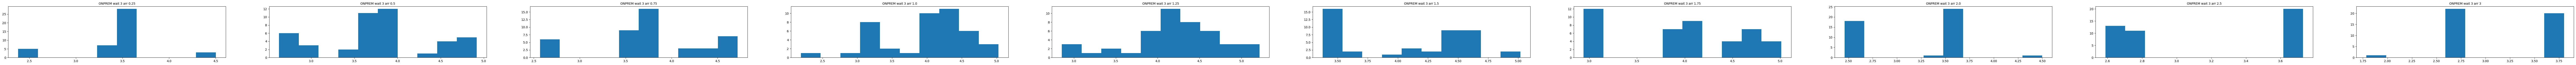

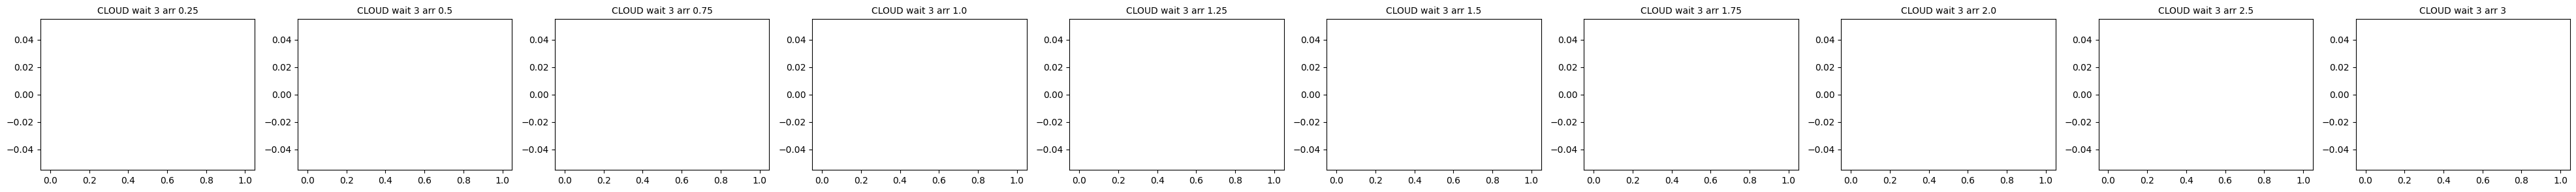

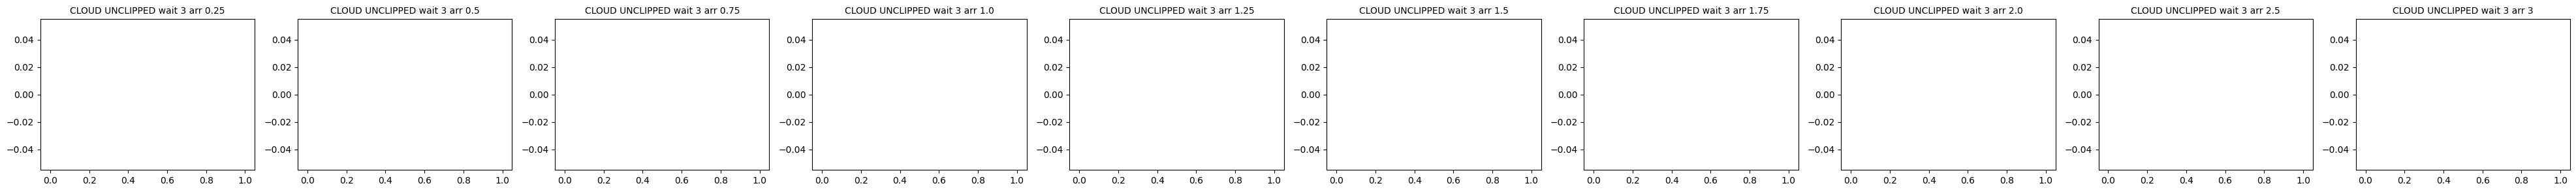

In [14]:
#jobs_wait = jobs_df.filter(['waiting_policy', 'wait_time', 'wait_times', 'arrival', 'start', 'submission_time', 'arrival_rate', 'arrival_mask'])




#print("JOB WAIT AFTER")
#print(jobs_wait['wait_times'])

#print(onprem_wait)
#print(cloud_wait)
'''
print("NEW WAITS")
print(new_waits)
print("CLOUD WAITS")
print(cloud_waits)
print("ONPREM WAITS")
print(onprem_waits)
'''
#time.sleep(100000)
#jobs_wait['waitimes']

#TODO: Plot separate graphs for onprem and cloud
def wait_time_histograms():
    fig, axs = plt.subplots(nrows=1, ncols=len(jobs_df), figsize=(150, 3)) 
    
    for i in range(len(jobs_df)):
        try: 
            axs[i].set_title("ONPREM " + "wait " + str(jobs_df['wait_time'][i]) +  " arr " + str(jobs_df['arrival_rate'][i]), fontsize=10)
            axs[i].hist(jobs_df['onprem_wait'][i])
        except: 
            continue

    fig, axs = plt.subplots(nrows=1, ncols=len(jobs_df), figsize=(50, 3)) 
    for i in range(len(jobs_df)):
        try: 
            axs[i].set_title("CLOUD " + "wait " + str(jobs_df['wait_time'][i]) +  " arr " + str(jobs_df['arrival_rate'][i]), fontsize=10)
            axs[i].hist(jobs_df['cloud_wait'][i])
        except: 
            continue

    fig, axs = plt.subplots(nrows=1, ncols=len(jobs_df), figsize=(50, 3)) 
    for i in range(len(jobs_df)):
        try: 
            axs[i].set_title("CLOUD UNCLIPPED " + "wait " + str(jobs_df['wait_time'][i]) +  " arr " + str(jobs_df['arrival_rate'][i]), fontsize=10)
            axs[i].hist(jobs_df['cloud_wait_unclipped'][i])
        except: 
            continue
            
def wait_time_histograms_old():
    fig, axs = plt.subplots(nrows=1, ncols=len(jobs_wait), figsize=(150, 3)) 
    for i in range(len(onprem_waits)):
        #import pdb; pdb.set_trace()
        try: 
            axs[i].set_title("ONPREM " + "wait " + str(jobs_wait['wait_time'][i]) +  " arr " + str(jobs_wait['arrival_rate'][i]), fontsize=10)
            axs[i].hist(onprem_waits[i])
            print("Mask")
            print(jobs_wait['arrival_mask'][i])
        except Exception as e: 
            continue 

    fig, axs = plt.subplots(nrows=1, ncols=len(jobs_wait), figsize=(50, 3)) 
    for i in range(len(cloud_waits)):
        #import pdb; pdb.set_trace()
        try: 
            axs[i].set_title("CLOUD " + "wait " + str(jobs_wait['wait_time'][i]) +  " arr " + str(jobs_wait['arrival_rate'][i]), fontsize=10)
            axs[i].hist(cloud_waits[i])
            print("Mask")
            print(jobs_wait['arrival_mask'][i])
        except Exception as e: 
            continue 
    plt.show()
    
wait_time_histograms()

32
START TIMES {'sleep-0-905729': 1683681760, 'sleep-1-142003': 1683681764, 'sleep-2-667500': 1683681768, 'sleep-3-71112': 1683681772, 'sleep-4-586393': 1683681777, 'sleep-5-254539': 1683681780, 'sleep-6-542947': 1683681785, 'sleep-7-302596': 1683681788, 'sleep-8-787287': 1683681792, 'sleep-9-128826': 1683681797, 'sleep-10-54928': 1683681801, 'sleep-11-960658': 1683681805, 'sleep-12-257515': 1683681808, 'sleep-13-128076': 1683681813, 'sleep-14-121144': 1683681816, 'sleep-15-943693': 1683681822, 'sleep-16-721713': 1683681826, 'sleep-17-151033': 1683681830, 'sleep-18-670986': 1683681834, 'sleep-19-668357': 1683681838, 'sleep-20-86827': 1683681842, 'sleep-21-421238': 1683681846, 'sleep-22-8799': 1683681850, 'sleep-23-955014': 1683681854, 'sleep-24-596239': 1683681858, 'sleep-25-100135': 1683681862, 'sleep-26-114146': 1683681866, 'sleep-27-640757': 1683681870, 'sleep-28-283504': 1683681874, 'sleep-29-977304': 1683681878, 'sleep-30-611799': 1683681882, 'sleep-31-396683': 1683681885, 'sleep-

TICKS 
[ 31  62  95 125]
LABELS 
['gke-starburst-cpu-workloads-04fa1bcf-8v6c'
 'gke-starburst-cpu-workloads-04fa1bcf-tsf4'
 'gke-starburst-cpu-workloads-04fa1bcf-trsl'
 'gke-starburst-cpu-workloads-04fa1bcf-b5bt']
START TIMES {'sleep-0-834562': 1683681988, 'sleep-1-972570': 1683681993, 'sleep-2-600877': 1683681996, 'sleep-3-920159': 1683682000, 'sleep-4-961058': 1683682004, 'sleep-5-428500': 1683682008, 'sleep-6-445424': 1683682012, 'sleep-7-558628': 1683682016, 'sleep-8-550044': 1683682020, 'sleep-9-378235': 1683682025, 'sleep-10-365085': 1683682029, 'sleep-11-370908': 1683682033, 'sleep-12-226557': 1683682037, 'sleep-13-582547': 1683682041, 'sleep-14-922800': 1683682045, 'sleep-15-163722': 1683682048, 'sleep-16-13730': 1683682053, 'sleep-17-340552': 1683682056, 'sleep-18-351674': 1683682060, 'sleep-19-575056': 1683682065, 'sleep-20-205865': 1683682069, 'sleep-21-345092': 1683682073, 'sleep-22-982779': 1683682078, 'sleep-23-21463': 1683682081, 'sleep-24-675653': 1683682085, 'sleep-25-

TICKS 
[ 31  63  94 126]
LABELS 
['gke-starburst-cpu-workloads-04fa1bcf-tsf4'
 'gke-starburst-cpu-workloads-04fa1bcf-b5bt'
 'gke-starburst-cpu-workloads-04fa1bcf-trsl'
 'gke-starburst-cpu-workloads-04fa1bcf-8v6c']
START TIMES {'sleep-0-413367': 1683680609, 'sleep-1-242938': 1683680613, 'sleep-2-882516': 1683680618, 'sleep-3-301277': 1683680621, 'sleep-4-321124': 1683680625, 'sleep-5-93604': 1683680630, 'sleep-6-727241': 1683680633, 'sleep-7-875048': 1683680638, 'sleep-8-669946': 1683680641, 'sleep-9-305786': 1683680646, 'sleep-10-395543': 1683680651, 'sleep-11-328571': 1683680654, 'sleep-12-351456': 1683680658, 'sleep-13-623670': 1683680662, 'sleep-14-173353': 1683680666, 'sleep-15-54571': 1683680670, 'sleep-16-635087': 1683680673, 'sleep-17-758031': 1683680678, 'sleep-18-986681': 1683680683, 'sleep-19-397185': 1683680687, 'sleep-20-603588': 1683680690, 'sleep-21-109019': 1683680694, 'sleep-22-602808': 1683680699, 'sleep-23-193535': 1683680703, 'sleep-24-473007': 1683680707, 'sleep-25-

TICKS 
[ 30  62  93 124]
LABELS 
['gke-starburst-cpu-workloads-04fa1bcf-8v6c'
 'gke-starburst-cpu-workloads-04fa1bcf-tsf4'
 'gke-starburst-cpu-workloads-04fa1bcf-trsl'
 'gke-starburst-cpu-workloads-04fa1bcf-b5bt']
START TIMES {'sleep-0-113241': 1683680840, 'sleep-1-954835': 1683680844, 'sleep-2-113012': 1683680848, 'sleep-3-869788': 1683680851, 'sleep-4-791837': 1683680856, 'sleep-5-650322': 1683680859, 'sleep-6-91971': 1683680864, 'sleep-7-316666': 1683680868, 'sleep-8-807188': 1683680872, 'sleep-9-229408': 1683680877, 'sleep-10-235089': 1683680880, 'sleep-11-817711': 1683680883, 'sleep-12-631357': 1683680889, 'sleep-13-499288': 1683680893, 'sleep-14-746132': 1683680897, 'sleep-15-886609': 1683680900, 'sleep-16-607517': 1683680904, 'sleep-17-942283': 1683680908, 'sleep-18-569414': 1683680912, 'sleep-19-206059': 1683680916, 'sleep-20-468920': 1683680920, 'sleep-21-261477': 1683680925, 'sleep-22-7704': 1683680928, 'sleep-23-312762': 1683680932, 'sleep-24-438911': 1683680937, 'sleep-25-7

TICKS 
[ 30  62  94 127]
LABELS 
['gke-starburst-cpu-workloads-04fa1bcf-tsf4'
 'gke-starburst-cpu-workloads-04fa1bcf-b5bt'
 'gke-starburst-cpu-workloads-04fa1bcf-trsl'
 'gke-starburst-cpu-workloads-04fa1bcf-8v6c']
START TIMES {'sleep-0-61248': 1683682217, 'sleep-1-909100': 1683682221, 'sleep-2-962108': 1683682225, 'sleep-3-909899': 1683682229, 'sleep-4-992343': 1683682233, 'sleep-5-591243': 1683682237, 'sleep-6-185195': 1683682241, 'sleep-7-564988': 1683682245, 'sleep-8-89613': 1683682249, 'sleep-9-635474': 1683682253, 'sleep-10-637439': 1683682257, 'sleep-11-206511': 1683682261, 'sleep-12-246409': 1683682265, 'sleep-13-562651': 1683682270, 'sleep-14-973192': 1683682274, 'sleep-15-668366': 1683682278, 'sleep-16-689730': 1683682281, 'sleep-17-624764': 1683682285, 'sleep-18-961636': 1683682290, 'sleep-19-594852': 1683682294, 'sleep-20-336540': 1683682298, 'sleep-21-435125': 1683682302, 'sleep-22-767270': 1683682306, 'sleep-23-331711': 1683682310, 'sleep-24-483168': 1683682314, 'sleep-25-

TICKS 
[ 27  62  95 127]
LABELS 
['gke-starburst-cpu-workloads-04fa1bcf-tsf4'
 'gke-starburst-cpu-workloads-04fa1bcf-b5bt'
 'gke-starburst-cpu-workloads-04fa1bcf-trsl'
 'gke-starburst-cpu-workloads-04fa1bcf-8v6c']
START TIMES {'sleep-0-522984': 1683681531, 'sleep-1-45055': 1683681534, 'sleep-2-491449': 1683681538, 'sleep-3-850717': 1683681542, 'sleep-4-352294': 1683681546, 'sleep-5-754382': 1683681551, 'sleep-6-290880': 1683681554, 'sleep-7-61436': 1683681558, 'sleep-8-368454': 1683681563, 'sleep-9-505966': 1683681566, 'sleep-10-199050': 1683681571, 'sleep-11-871695': 1683681575, 'sleep-12-723931': 1683681579, 'sleep-13-867149': 1683681584, 'sleep-14-164071': 1683681588, 'sleep-15-204717': 1683681592, 'sleep-16-749020': 1683681595, 'sleep-17-970709': 1683681599, 'sleep-18-995142': 1683681603, 'sleep-19-296351': 1683681607, 'sleep-20-108750': 1683681611, 'sleep-21-315373': 1683681615, 'sleep-22-745385': 1683681619, 'sleep-23-12255': 1683681623, 'sleep-24-183660': 1683681627, 'sleep-25-2

05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/usr/local/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/usr/local/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/usr/local/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='nor

05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/usr/local/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/usr/local/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/usr/local/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/cmss10.ttf', name='cmss10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: sc

05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansOriya.ttc', name='Noto Sans Oriya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSItalic.ttf', name='System Font', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Beirut.ttc', name='Beirut', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMeeteiMayek-Regular.ttf', name='Noto Sans Meetei Mayek', style='normal', variant='norm

05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SnellRoundhand.ttc', name='Snell Roundhand', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSaurashtra-Regular.ttf', name='Noto Sans Saurashtra', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Noteworthy.ttc', name='Noteworthy', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSMono.ttf', name='.SF NS Mono', style='normal', variant=

05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPsalterPahlavi-Regular.ttf', name='Noto Sans Psalter Pahlavi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/GeezaPro.ttc', name='Geeza Pro', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Bold Italic.ttf', name='Verdana', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 4.971363636363637
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Nadeem.ttc', name='Nadeem', style

05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFiveSymReg.otf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSerifCaption.ttc', name='PT Serif Caption', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPalmyrene-Regular.ttf', name='Noto Sans Palmyrene', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana.ttf', name='Verd

05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/ITFDevanagari.ttc', name='ITF Devanagari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansThaana-Regular.ttf', name='Noto Sans Thaana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKayahLi-Regular.ttf', name='Noto Sans Kayah Li', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Symbol.ttf', name='Symbol', style='no

05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bangla MN.ttc', name='Bangla MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNewa-Regular.ttf', name='Noto Sans Newa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMeroitic-Regular.ttf', name='Noto Sans Meroitic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mishafi Gold.ttf', name='Mishafi Gol

TICKS 
[ 29  62  92 126]
LABELS 
['gke-starburst-cpu-workloads-04fa1bcf-8v6c'
 'gke-starburst-cpu-workloads-04fa1bcf-tsf4'
 'gke-starburst-cpu-workloads-04fa1bcf-trsl'
 'gke-starburst-cpu-workloads-04fa1bcf-b5bt']


05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Khmer Sangam MN.ttf', name='Khmer Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/STHeiti Light.ttc', name='Heiti TC', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpReg.otf', name='STIXIntegralsUp', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniIta.otf', name='STIXNonUnicode', style='italic', varia

05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCypriot-Regular.ttf', name='Noto Sans Cypriot', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/BigCaslon.ttf', name='Big Caslon', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tahoma Bold.ttf', name='Tahoma', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Galvji.ttc', name='Galvji', style='normal', variant=

05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSyriac-Regular.ttf', name='Noto Sans Syriac', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gujarati Sangam MN.ttc', name='Gujarati Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansModi-Regular.ttf', name='Noto Sans Modi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
05-09 18:57:50 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Bold Itali

05-09 18:57:51 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS Italic.ttf', name='Trebuchet MS', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
05-09 18:57:51 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Khmer MN.ttc', name='Khmer MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
05-09 18:57:51 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya Sangam MN.ttc', name='Oriya Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
05-09 18:57:51 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Lao MN.ttc', name='Lao MN', style='normal', variant='

05-09 18:57:51 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SukhumvitSet.ttc', name='Sukhumvit Set', style='normal', variant='normal', weight=250, stretch='normal', size='scalable')) = 10.1925
05-09 18:57:51 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Muna.ttc', name='Muna', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
05-09 18:57:51 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/HelveticaNeue.ttc', name='Helvetica Neue', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
05-09 18:57:51 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTirhuta-Regular.ttf', name='Noto Sans Tirhuta', style='normal', variant='

05-09 18:57:51 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLinearA-Regular.ttf', name='Noto Sans Linear A', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
05-09 18:57:51 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/KufiStandardGK.ttc', name='KufiStandardGK', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
05-09 18:57:51 | DEBUG  | matplotlib.font_manager                  || findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBatak-Regular.ttf', name='Noto Sans Batak', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
05-09 18:57:51 | DEBUG  | matplotlib.font_manager                  || findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=

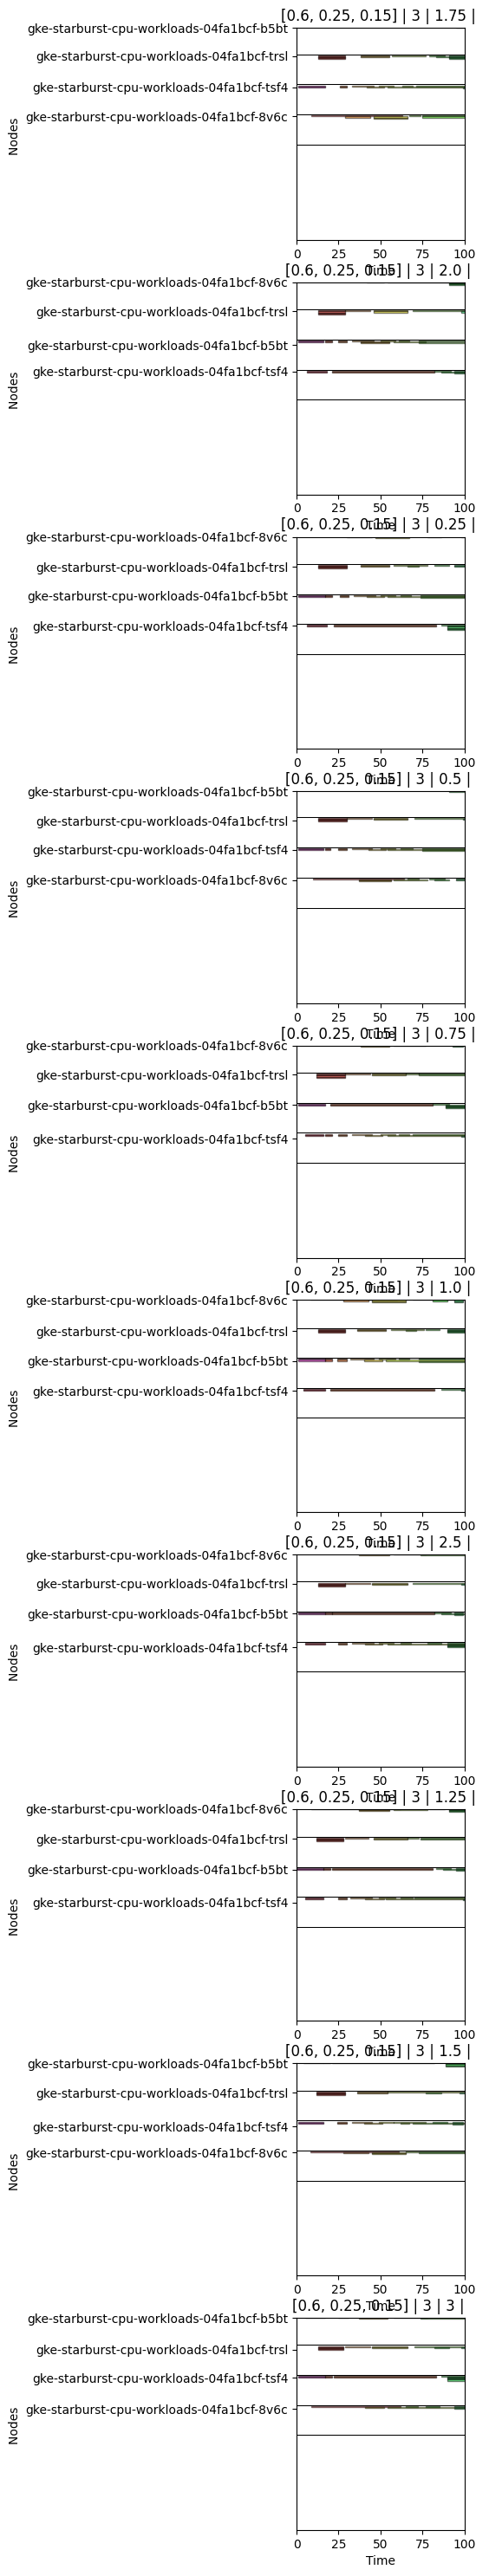

In [15]:
gpus_per_node = 32
avoid_congestion = True
print(gpus_per_node)
# TODO: Rewrite this function to take in dataframe (do not parse data from logs)
data = job_logs.view_real_arrival_times(event_number=logs, scale=0.5, plot_sweep=True, get_data=False, dim=(-100, 100, 0, 100), ratio=(5, 75), gpus_per_node = gpus_per_node, avoid_congestion=avoid_congestion, clip_last_job=True)

if data and len(data) == 3:
    jobs, events, submissions = data

In [16]:
'''
metrics_df = pd.DataFrame.from_dict(metrics)
metrics_df = metrics_df.transpose()
metrics_df.keys()
metrics_df.values()
t_metrics_df = metrics_df.transpose()
t_metrics_df= t_metrics_df.rename(columns={'cpus_per_node': 'gpus_per_node'})
t_metrics_df.keys()
'''

def new_plotting_function():
    return 0 

def skyburst_plotting_function(): 
    return 0 

def set_plotting_setting(ax):
    plt.rcParams.update({'font.size': 15})
    ax.grid(True, which='both')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    #ax.tick_params(bottom=False, left=False)
    ax.tick_params(bottom=True, left=False)
    ax.set_axisbelow(True)

label_dict = {
    'avg_jct': 'Avg. JCT (hr)',
    'cost_mult': '% Cost Savings\nover No Wait',
    'cost_diff': 'Cost Savings\nover No Wait',
    'cluster_size': 'Cluster Size (# Nodes)',
    'norm_system_utilization': 'System Utilization',
    'system_utilization': 'System Utilization',
    'cluster_utilization': 'Cluster Utilization',
    'total_cloud_cost': 'Cloud Cost',
    'arrival_rate': 'Arrival Rate',
}

legend_dict = {
    'constant': 'Constant',
    'linear_runtime': 'Runtime',
    'linear_cost': 'Cost',
    'zero': 'No Wait',
    'linear_runtime_filter_cpu': 'Runtime-Preempt-CPU'
}

def join_baseline(df, 
                          x_axis: str,
                          y_axis: list = ['cost_mult', 'avg_jct'],
                          df_filter: dict = {},
                          baseline_filter: dict={'waiting_policy': 'zero',},
                          groupby_values=['waiting_policy', 'waiting_factor'],
                          normalize_x_axis=False):
    if isinstance(y_axis, str):
        y_axis = [y_axis]
    fig, axs = plt.subplots(nrows=1, ncols=len(y_axis), figsize=(5*len(y_axis), 3.5))
    
    for k,v in df_filter.items():
        df = df[df[k]==v]
       
    baseline_df = df
    for k,v in baseline_filter.items():
        assert not isinstance(v, list)
        baseline_df = baseline_df[baseline_df[k]==v]
        #df = df[df[k]!=v]
    diff_df = pd.merge(df, baseline_df, left_on=x_axis,right_on=x_axis)
    return diff_df
    
def get_default(df, 
                          x_axis: str,
                          y_axis: list = ['cost_mult', 'avg_jct'],
                          df_filter: dict = {},
                          baseline_filter: dict={'waiting_policy': 'zero',},
                          groupby_values=['waiting_policy', 'waiting_factor'],
                          normalize_x_axis=False):
    if isinstance(y_axis, str):
        y_axis = [y_axis]
        
    fig, axs = plt.subplots(nrows=1, ncols=len(y_axis), figsize=(5*len(y_axis), 3.5))
    
    for k,v in df_filter.items():
        print(k)
        print(v)
        print(df[k])
        #print(df[k]==v)
        #df[k] = df[k].apply(lambda x: [0, 0, 0] if len(x) != 3 else x)
        #print(df[k].eq(v))
        
        
        mask = df[k].apply(lambda x: x == v)
        print(mask)
        if isinstance(v, list):
            df = df[mask]
            #df[k].eq(v)
            #df[k] = df[k].apply(lambda x: [0, 0, 0] if len(x) != 3 else x)
            #df = df[df[k].eq(v)]
            
        #df = df[df[k]==v]
        
    return df
    
def get_baseline(df, 
                          x_axis: str,
                          y_axis: list = ['cost_mult', 'avg_jct'],
                          df_filter: dict = {},
                          baseline_filter: dict={'waiting_policy': 'zero',},
                          groupby_values=['waiting_policy', 'waiting_factor'],
                          normalize_x_axis=False):
    if isinstance(y_axis, str):
        y_axis = [y_axis]
    fig, axs = plt.subplots(nrows=1, ncols=len(y_axis), figsize=(5*len(y_axis), 3.5))
    
    for k,v in df_filter.items():        
        mask = df[k].apply(lambda x: x == v)
        if isinstance(v, list):
            df = df[mask]
    
    baseline_df = df
    
    for k,v in baseline_filter.items():
        #assert not isinstance(v, list)
        #baseline_df = baseline_df[baseline_df[k]==v]
        mask = baseline_df[k].apply(lambda x: x == v)
        baseline_df = baseline_df[mask]
        baseline_df = df[mask]
        #print(mask)
        #if isinstance(v, list):
            #df[k].eq(v)
            #df[k] = df[k].apply(lambda x: [0, 0, 0] if len(x) != 3 else x)
            #df = df[df[k].eq(v)]
            
        #df = df[df[k]!=v]
    
    diff_df = pd.merge(df, baseline_df, left_on=x_axis,right_on=x_axis)
    
    if normalize_x_axis:
        if x_axis == 'cluster_size':
            # Hardcoded in Philly trace, precomputed ahead of time
            if df['dataset'].iloc[0] == 'philly':
                total_job_volume = 1155998.77277777
                job_makespan = 2559.3205555555555
            elif df['dataset'].iloc[0] == 'helios':
                total_job_volume = 1853756.1241666232
                job_makespan = 4651.911388888889
            diff_df['norm_system_utilization'] = total_job_volume/(job_makespan*diff_df['cluster_size']*df['gpus_per_node'].iloc[0])
            x_axis = 'norm_system_utilization'
        elif x_axis == 'arrival_rate':
            avg_job_volume_rate = diff_df['arrival_rate'] * np.mean(df['num_gpus'].iloc[0]* df['runtime'].iloc[0])
            #print(avg_job_volume_rate)
            #print(df['cluster_size'].iloc[0])
            #print(df['gpus_per_node'].iloc[0])
            #print(df['cluster_size'].iloc[0]*df['gpus_per_node'].iloc[0])
            diff_df['norm_system_utilization'] = avg_job_volume_rate/(df['cluster_size'].iloc[0]*df['gpus_per_node'].iloc[0])
            x_axis = 'norm_system_utilization'
        
    #return baseline_df
    return diff_df

def simulator_plotting_fn(df, 
                          x_axis: str,
                          y_axis: list = ['cost_mult', 'avg_jct'],
                          df_filter: dict = {},
                          baseline_filter: dict={'waiting_policy': 'zero',},
                          groupby_values=['waiting_policy', 'waiting_factor'],
                          normalize_x_axis=False,
                          fig_ratio=(5, 3.5)):
    if isinstance(y_axis, str):
        y_axis = [y_axis]
    fig, axs = plt.subplots(nrows=1, ncols=len(y_axis), figsize=(fig_ratio[0]*len(y_axis), fig_ratio[1]))
    
    if len(y_axis) == 1: 
        if not isinstance(axs, list):
            axs = [axs]
    print(axs)
    #time.sleep(1000)
    
    '''
    for k,v in df_filter.items():
        if isinstance(v, list):
            df = df[df[k]==v]
    '''

    for k,v in df_filter.items():        
        mask = df[k].apply(lambda x: x == v)
        if isinstance(v, list):
            df = df[mask]
       
    baseline_df = df
    
    for k,v in baseline_filter.items():
        assert not isinstance(v, list)
        baseline_df = baseline_df[baseline_df[k]==v]
        #df = df[df[k]!=v]
        
    diff_df = pd.merge(df, baseline_df, left_on=x_axis,right_on=x_axis)
    
    if normalize_x_axis:
        if x_axis == 'cluster_size':
            # Hardcoded in Philly trace, precomputed ahead of time
            if df['dataset'].iloc[0] == 'philly':
                total_job_volume = 1155998.77277777
                job_makespan = 2559.3205555555555
            elif df['dataset'].iloc[0] == 'helios':
                total_job_volume = 1853756.1241666232
                job_makespan = 4651.911388888889
            diff_df['norm_system_utilization'] = total_job_volume/(job_makespan*diff_df['cluster_size']*df['gpus_per_node'].iloc[0])
            x_axis = 'norm_system_utilization'
        elif x_axis == 'arrival_rate':
            # Volume rate => runtime must be in either hours or seconds 
            '''
            Verification: 
            - Arrival_Rate = VERIFIED ~ error 
            - Num_gpus = Verified
            - Runtime = Verified 
            '''
            avg_job_volume_rate = diff_df['arrival_rate'] * np.mean(df['num_gpus'].iloc[0]* df['runtime'].iloc[0])
            df['z_mean_runtime'] = np.mean(df['num_gpus'].iloc[0]* df['runtime'].iloc[0])
            df['z_cluster_nodes'] = (df['cluster_size'].iloc[0]*df['gpus_per_node'].iloc[0])
            #print(avg_job_volume_rate)
            #print(df['cluster_size'].iloc[0])
            #print(df['gpus_per_node'].iloc[0])
            #print(df['cluster_size'].iloc[0]*df['gpus_per_node'].iloc[0])
            diff_df['norm_system_utilization'] = avg_job_volume_rate/(df['cluster_size'].iloc[0]*df['gpus_per_node'].iloc[0])
            x_axis = 'norm_system_utilization'
    
    #print(df)
    
    def cost_multiplier(row):
        baseline_cost = row['total_cloud_cost_y']
        cost = row['total_cloud_cost_x']
        if baseline_cost == 0 and cost==0:
            return 0
        elif baseline_cost <=10000:
            # Small cloud cost for No wait
            # Savings over small cloud cost is negligible for organizations.
            return 0
        elif baseline_cost == 0 and cost>0:
            return 100
        return 100* (1 - (cost/baseline_cost))
    
    def cost_difference(row):
        baseline_cost = row['total_cloud_cost_y']
        cost = row['total_cloud_cost_x']
        return baseline_cost - cost
    
    diff_df['cost_mult'] = diff_df.apply(cost_multiplier, axis=1)
    diff_df['cost_diff'] = diff_df.apply(cost_difference, axis=1)
    groupby_values = [f'{g}_x' for g in groupby_values]
    mod_y_axis = [f'{y}_x' if y!='cost_mult' and y!='cost_diff' else y for y in y_axis]
    import itertools
    markers = itertools.cycle(('v', '^','.', 'o', '*',',', '+',)) 
    for idx, (label, grp) in enumerate(diff_df.groupby(groupby_values)):
        marker = next(markers)
#         if 'waiting_policy' in groupby_values[0]:
#             label = [legend_dict[label[0]]] + list(label[1:])
#             print(label)
        for ax_idx, ax in enumerate(axs):           
            grp.plot(x = x_axis, y = mod_y_axis[ax_idx],ylabel=label_dict[y_axis[ax_idx]], \
                     xlabel=label_dict[x_axis], marker=marker, ax = ax, label = label, legend=None)
    
    
    for ax in axs:
        set_plotting_setting(ax)
    #axs[1].set_xlim(right=36, left=20)
    lines, labels = ax.get_legend_handles_labels()
    fig.legend(lines, labels, ncol=len(labels), \
               bbox_to_anchor=(0, 0.92, 1, 0.2),loc='upper center')
    plt.tight_layout()
    plt.show()  

In [17]:
jobs_df

,idx,runtime,arrival,num_gpus,allocated_gpus,start,instance_type,node_index,node,cpus,submission_time,wait_times,uniform_arrival,uniform_submission,waiting_policy,time_constrained,cluster_size,cpus_per_node,cloud_cluster_nodes,cloud_cpu_per_node,random_seed,total_jobs,batch_time,wait_time,time_out,mean_duration,arrival_rate,cpu_sizes,cpu_dist,gpu_sizes,gpu_dist,memory_sizes,memory_dict,uniform_arrival_sweep,uniform_submission_sweep,waiting_policy_sweep,time_constrained_sweep,cluster_size_sweep,cpus_per_node_sweep,cloud_cluster_nodes_sweep,cloud_cpu_per_node_sweep,random_seed_sweep,total_jobs_sweep,batch_time_sweep,wait_time_sweep,time_out_sweep,mean_duration_sweep,arrival_rate_sweep,cpu_sizes_sweep,cpu_dist_sweep,gpu_sizes_sweep,gpu_dist_sweep,memory_sizes_sweep,memory_dict_sweep,gpus_per_node,arrival_mask,onprem_mask,cloud_wait_unclipped,cloud_wait,onprem_wait,avg_wait,avg_runtime,total_time,completion_time,avg_jct,cluster_utilization,total_cloud_cost
0,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[16, 12, 53, 17, 4, 61, 5, 15, 13, 17, 10, 20,...","[2.481705904006958, 7.481705904006958, 11.4817...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[{2: []}, {3: []}, {0: []}, {1: []}, {2: []}, ...","[2.481705904006958, 7.481705904006958, 11.4817...","[e2-standard-8, e2-standard-8, e2-standard-8, ...","[2, 3, 0, 1, 2, 3, 2, 0, 2, 1, 2, 0, 2, 2, 1, ...","[gke-starburst-cpu-workloads-04fa1bcf-b5bt, gk...","[2, 2, 1, 4, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, ...","[0.0, 3.98594331741333, 8.039539813995361, 11....","[2.481705904006958, 3.495762586593628, 3.44216...",4,True,fifo_wait,True,4,8,4,8,0,100,180,3,5,15,0.25,"[1, 2, 4]","[0.6, 0.25, 0.15]","[1, 2, 4, 8, 16, 32]","[0, 0.2, 0.2, 0.2, 0.2, 0.2]","[100, 500, 1000, 50000]","[0.25, 0.25, 0.25, 0.25]",4,True,fifo_wait,True,4,8,4,8,0,100,180,3,5,15,0.25,"[1, 2, 4]","[0.6, 0.25, 0.15]","[1, 2, 4, 8, 16, 32]","[0, 0.2, 0.2, 0.2, 0.2, 0.2]","[100, 500, 1000, 50000]","[0.25, 0.25, 0.25, 0.25]",8,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",[],[],"[2.481705904006958, 3.495762586593628, 3.44216...",3.417973,19.627907,"[18.481705904006958, 15.495762586593628, 56.44...","[18.481705904006958, 19.481705904006958, 64.48...",23.045880,0.216533,0.216533
1,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[15, 12, 54, 17, 3, 61, 5, 15, 12, 19, 10, 20,...","[2.682251453399658, 6.682251453399658, 11.6822...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[{2: []}, {0: []}, {3: []}, {1: []}, {2: []}, ...","[2.682251453399658, 6.682251453399658, 11.6822...","[e2-standard-8, e2-standard-8, e2-standard-8, ...","[2, 0, 3, 1, 2, 0, 2, 1, 2, 3, 2, 1, 2, 2, 3, ...","[gke-starburst-cpu-workloads-04fa1bcf-tsf4, gk...","[2, 2, 1, 4, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, ...","[0.0, 3.8979039192199707, 7.793416976928711, 1...","[2.682251453399658, 2.7843475341796875, 3.8888...",4,True,fifo_wait,True,4,8,4,8,0,100,180,3,5,15,0.5,"[1, 2, 4]","[0.6, 0.25, 0.15]","[1, 2, 4, 8, 16, 32]","[0, 0.2, 0.2, 0.2, 0.2, 0.2]","[100, 500, 1000, 50000]","[0.25, 0.25, 0.25, 0.25]",4,True,fifo_wait,True,4,8,4,8,0,100,180,3,5,15,0.5,"[1, 2, 4]","[0.6, 0.25, 0.15]","[1, 2, 4, 8, 16, 32]","[0, 0.2, 0.2, 0.2, 0.2, 0.2]","[100, 500, 1000, 50000]","[0.25, 0.25, 0.25, 0.25]",8,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",[],[],"[2.682251453399658, 2.7843475341796875, 3.8888...",3.774183,19.500000,"[17.682251453399658, 14.784347534179688, 57.88...","[17.682251453399658, 18.682251453399658, 65.68...",23.274183,0.222431,0.222431
2,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[16, 11, 53, 17, 4, 61, 5, 15, 12, 17, 10, 20,...","[3.64595103263855, 7.64595103263855, 11.645951...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[{2: []}, {3: []}, {0: []}, {1: []}, {3: []}, ...","[3.64595103263855, 7.64595103263855, 11.645951...","[e2-standard-8, e2-standard-8, e2-standard-8, ...","[2, 3, 0, 1, 3, 2, 3, 

[<Axes: > <Axes: >]


ValueError: number sections must be larger than 0.

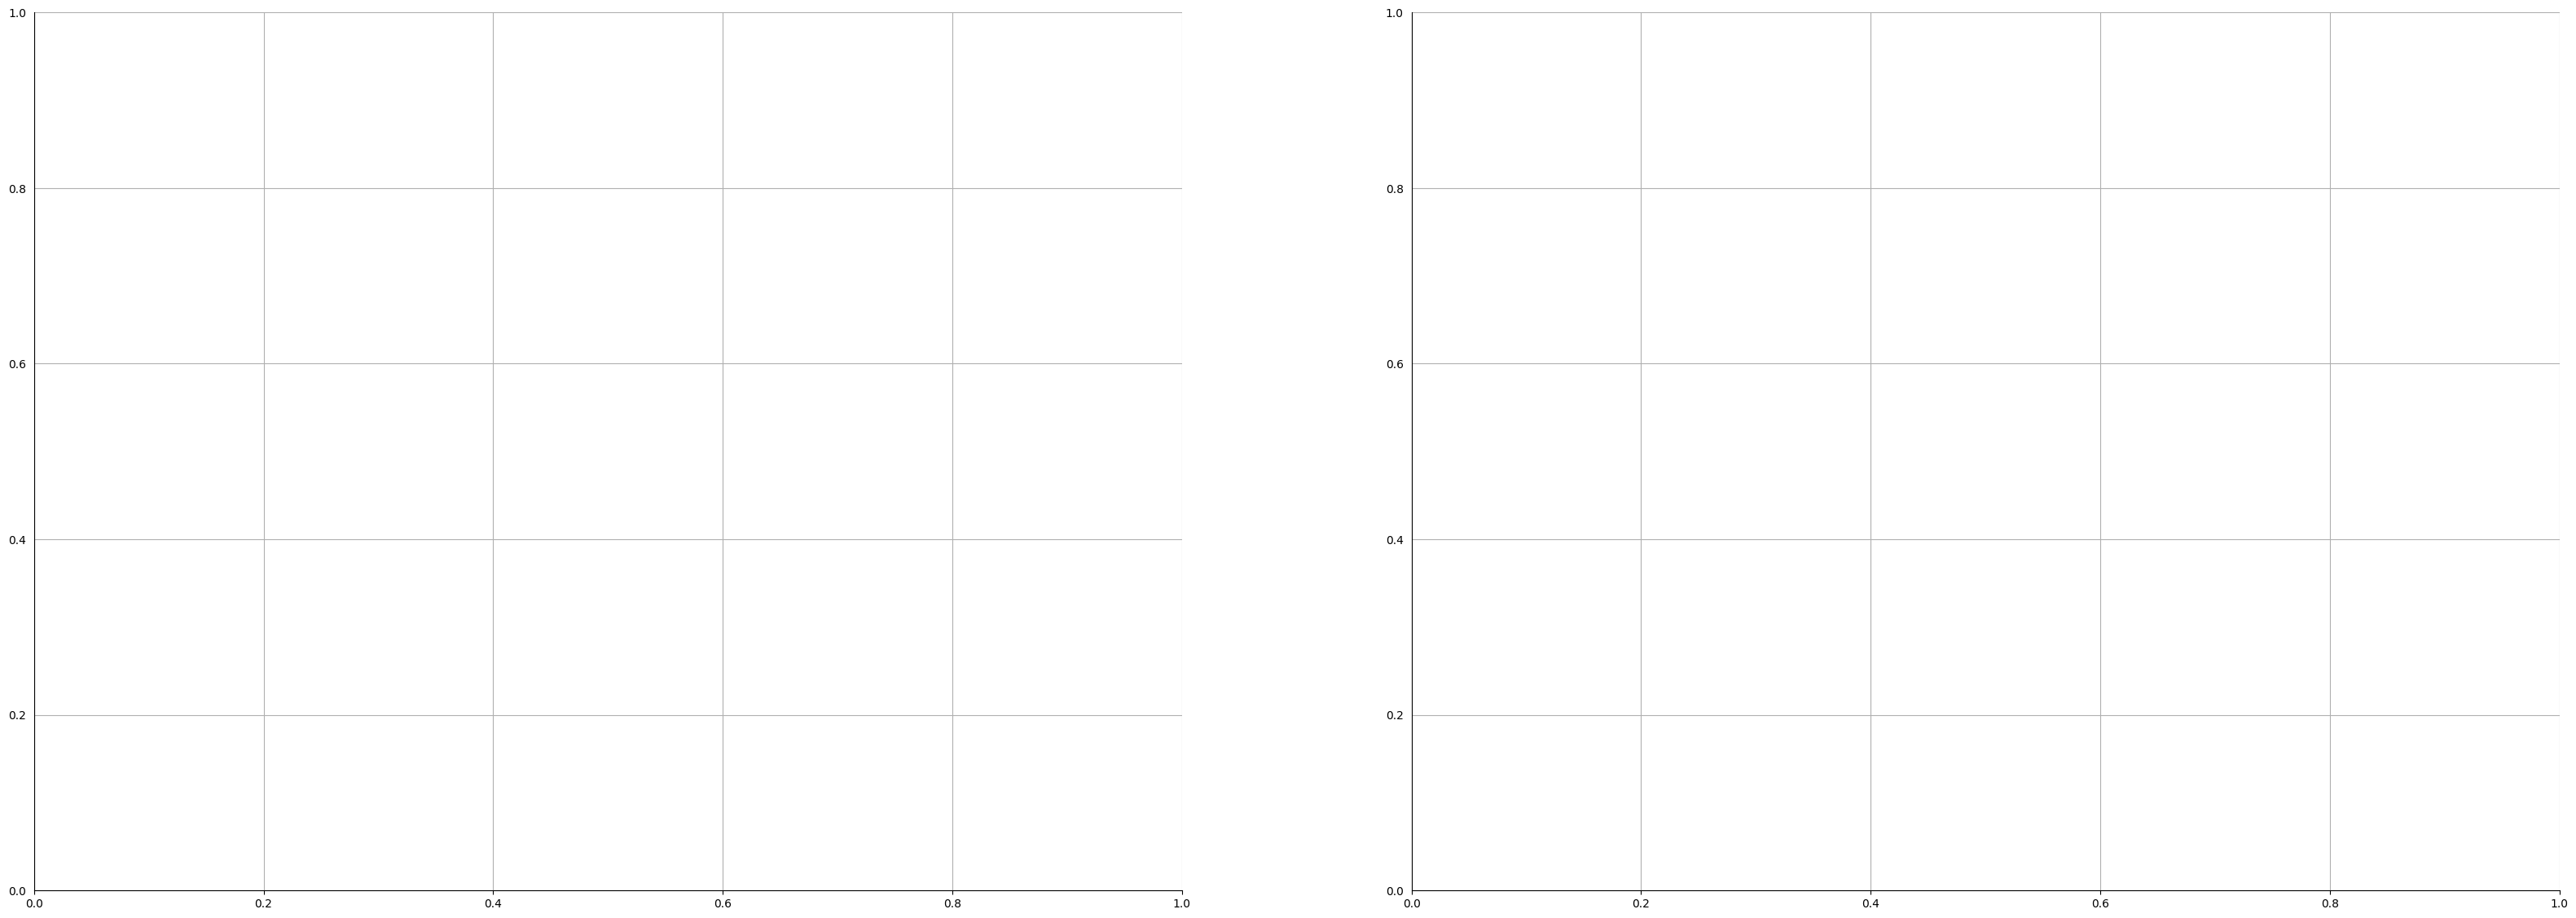

In [18]:
# TODO: Add spec to increase plot size

#dists = [[0.2, 0.4, 0.4], [0, 0.5, 0.5], [0, 0, 1]]
dists = [[0.6, 0.25, 0.15]]#[[0, 0.5, 0.5]]
scale = 4
for dist in dists:#[[0.2, 0.4, 0.4], [0, 0.5, 0.5], [0, 0, 1]]:
    #print(f'dist: {dist}')
    simulator_plotting_fn(jobs_df, x_axis='arrival_rate', \
                          #y_axis=['total_cloud_cost'], 
                          y_axis=['avg_jct', 'cluster_utilization'],\
                          #y_axis=['avg_jct'],\
                          #'avg_jct', 'total_cloud_cost'], \
                          df_filter={'cpu_dist': dist}, 
                          #baseline_filter= {'wait_time': 1.0}, \
                          #baseline_filter= {'waiting_policy': 'fifo_wait', 'wait_time': 0.0}, \
                          baseline_filter= {'waiting_policy': 'fifo_wait', 'wait_time': 2.5}, \
                          #baseline_filter= {'waiting_policy': 'fifo_wait', 'wait_time': 1.0}, \
                          #groupby_values=['waiting_policy', 'wait_time'], normalize_x_axis=True, \
                          groupby_values=['wait_time'], normalize_x_axis=True, \
                          fig_ratio=(5*scale, 3.5*scale))
    


In [ ]:
default_df = get_default(jobs_df, x_axis='arrival_rate', y_axis=['avg_jct'], \
                           #df_filter={'cpu_dist': [0.2, 0.4, 0.4]}, \
                         #df_filter={'cpu_dist': [0.0, 0.5, 0.5]}, \
                         df_filter={'cpu_dist': [0.6, 0.25, 0.15]}, \
                          #df_filter={'wait_time': 1.0}, \
                      #baseline_filter= {'waiting_policy': 'fifo_wait', 'wait_time': 1.0}, \
                          #baseline_filter= {'waiting_policy': 'fifo_wait', 'wait_time': 0.0}, \
                         baseline_filter= {'waiting_policy': 'fifo_wait', 'wait_time': 0}, \
                           groupby_values=['waiting_policy'], normalize_x_axis=True)


baseline_df = get_baseline(jobs_df, x_axis='arrival_rate', y_axis=['avg_jct'], \
                           #df_filter={'cpu_dist': [0.2, 0.4, 0.4]}, \
                           #df_filter={'cpu_dist': [0.0, 0.5, 0.5]}, \
                           df_filter={'cpu_dist': [0.6, 0.25, 0.15]},
                      #baseline_filter= {'waiting_policy': 'fifo_wait', 'wait_time': 1.0}, \
                           baseline_filter= {'waiting_policy': 'fifo_wait', 'wait_time': 0}, \
                           groupby_values=['waiting_policy'], normalize_x_axis=True)


merged_df = join_baseline(jobs_df, x_axis='arrival_rate', y_axis=['avg_jct', 'total_cloud_cost'], \
                          #baseline_filter= {'waiting_policy': 'fifo_wait', 'wait_time': 1.0}, \
                          baseline_filter= {'waiting_policy': 'fifo_wait', 'wait_time': 0}, \
                      groupby_values=['waiting_policy'], normalize_x_axis=True)
default_df, baseline_df, merged_df

In [ ]:
#jobs_df

In [ ]:
hyp = copy.deepcopy(sampled_jobs.DEFAULT_HYPERPARAMETERS)

hyp['arrival_rate'] = 10
hyp['batch_time'] = 600
hyp['total_jobs'] = 5
hyp['mean_duration'] = 60
arrived_jobs, arrivals = sampled_jobs.generate_jobs(hyp)

#print(arrived_jobs)
#print(arrivals)

In [ ]:
## HYPERPARAMETER
'''
Vary arrival rate
    - CPU jobs for Philly/Helios
        
- Mimic GPU jobs ~ with CPU
    - vary # jobs per minute 
    - test contant waiting for baseline
    - 0(Baseline), 0.25, 0.5, 1 ratio of runtime for waiting policy 
        - 
    
- Plot Cluster Utilization 
- Plot Cloud Cost 
'''